In [41]:
import lightcurvesimulation as LC
import numpy as np
import random
from dataclasses import dataclass
from PyAstronomy.pyTiming import pyPeriod
import scipy.signal as sig 
import pandas as pd
import time
import math
import sys
import matplotlib.pyplot as plt

@dataclass
class AnalysisParams:
    is_binary = True
    survey = LC.LSST
    baseline = survey.observation_period
    tau = baseline * 10
    sigma = np.exp(-1.6)
    amplitude = 0.5
    period= 1000
    phase = 0

    def __str__(self):
        return 'sigma={0:.2f},amplitude={1:.2f}'.format(self.sigma, self.amplitude)

class AnalysisRunner:
    def run(self, params = AnalysisParams(), num_iterations = 100):
        lcsim = LC.LightCurveSimulation()
        periods = np.arange(30, 3000, 10) 
        freqs = 1./periods 
        experiment_data = []
        start_time = time.time()
        for _ in range(num_iterations):
            is_binary = bool(random.getrandbits(1))
            period = None
            #print("[AnalysisRunner] is_binary: " + str(is_binary))
            if is_binary:
                period = random.randint(30, 3000)
                #print("[AnalysisRunner] period: " + str(period))

            (t, mag, magerr, _, _, _) = lcsim.generate_light_curve(
                survey=params.survey, is_binary = is_binary, tau=params.tau, 
                sigma=params.sigma, amplitude=params.amplitude, period=period, phase=params.phase)
            # Perform analysis
            # Compute the GLS periodogram with default options.
            clp = pyPeriod.Gls((t, mag, magerr), freq=freqs, norm='chisq')
            # Find the frequencies with the strongest signal
            # get the max power
            top_ind = np.argmax(clp.power)
            detected_period = periods[top_ind]
            max_power = clp.power[top_ind]
            max_fap = clp.FAP(max_power)

            if max_fap > 0:
                max_fap_adj = -(math.log10(max_fap))
            else:
                max_fap_adj = sys.float_info.min
            period_error= None
            if is_binary:
                period_error = abs(detected_period/period - 1)

            peak_ind, _ = sig.find_peaks(clp.power, max_power/4.0)
            num_peaks = len(peak_ind)
            experiment_data.append([is_binary, period, detected_period, period_error, max_power, max_fap_adj, num_peaks])
            
        print('Execution time: {0:.2f}'.format(time.time() - start_time))

        return experiment_data




No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No o

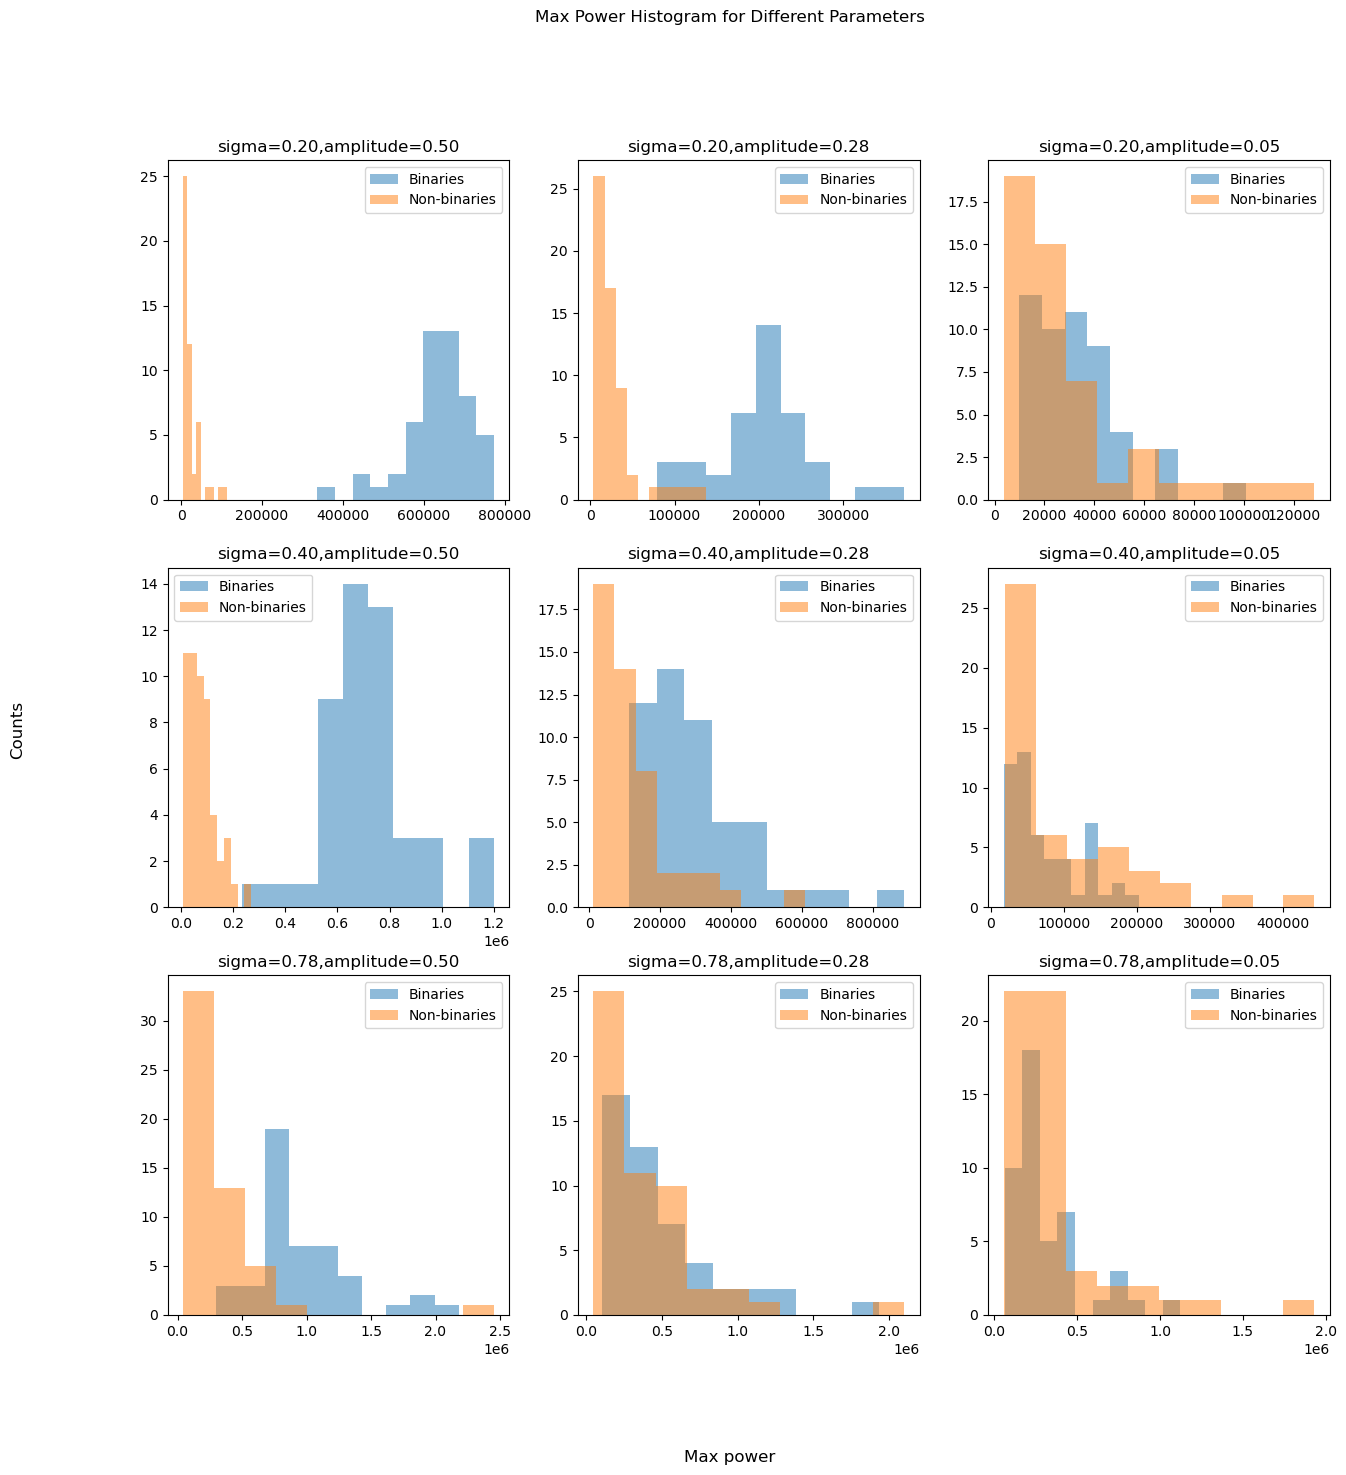

In [64]:
import matplotlib.pyplot as plt

params = AnalysisParams()
sigmas = [np.exp(-1.6), np.exp((-1.6-0.25)/2), np.exp(-0.25)]
amplitudes = [0.5, 0.55/2, 0.05]
fig, axs = plt.subplots(3,3)
fig.suptitle('Max Power Histogram for Different Parameters')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(sigmas)):
    for j in range(len(amplitudes)):
        params.sigma = sigmas[i]
        params.amplitude = amplitudes[j]
        results = AnalysisRunner().run(params=params, num_iterations=100)
        df = pd.DataFrame(results, columns=["is_binary", "period", 'detected_period', 'period_error', 'max_power', 'max_fap_adj', 'num_peaks'])
        
        axs[i, j].set_title(params)
        axs[i, j].hist(df.loc[df["is_binary"] == True, "max_power"], label='Binaries', alpha = 0.5)
        axs[i, j].hist(df.loc[df["is_binary"] == False, "max_power"], label='Non-binaries', alpha = 0.5)
        axs[i, j].legend()

#axs[0, 0].legend(loc="upper right")
fig.supxlabel('Max power')
fig.supylabel('Counts')

#fig.tight_layout()
fig.savefig('output/max_power_analysis.png')
plt.show()
